In [1]:
import librosa
import numpy as np
import librosa.display

In [4]:
audio_path = "data/-6_dB_slider/slider/id_00/abnormal/00000002.wav"
audio, sample_rate = librosa.load(audio_path)

In [5]:
import IPython.display as ipd
ipd.Audio(audio_path)

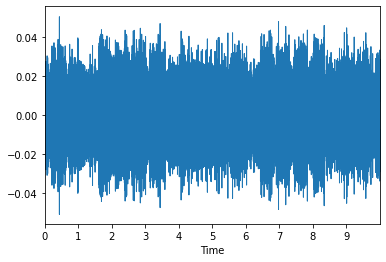

In [6]:
librosa.display.waveplot(audio, sr=sample_rate)

In [7]:
audio

array([-0.00450214, -0.00463825, -0.00280949, ..., -0.00916571,
       -0.00874133, -0.00748187], dtype=float32)

In [8]:
audio.shape

(220500,)

In [9]:
sample_rate

22050

In [10]:
import matplotlib.pyplot as plt

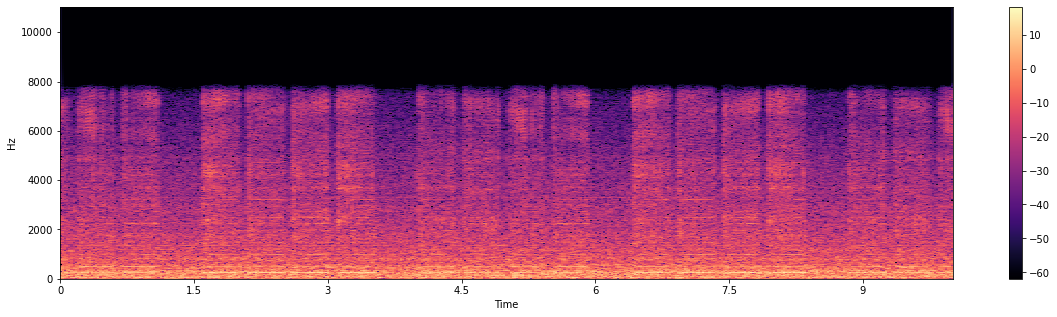

In [11]:
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [12]:
mfccs = librosa.feature.mfcc(audio, sr=sample_rate, n_mfcc=1)
print(mfccs.shape)

(1, 431)


In [13]:
Xdb.shape

(1025, 431)

In [14]:
mfccs

array([[-322.37878, -332.46503, -344.1655 , -347.10077, -363.7025 ,
        -371.79565, -373.1777 , -370.2594 , -349.1794 , -333.82523,
        -333.75992, -331.6433 , -327.11163, -329.38068, -328.37573,
        -327.03195, -329.59164, -337.52933, -342.91846, -337.04688,
        -334.5392 , -341.9763 , -349.5176 , -349.7378 , -344.6638 ,
        -343.76355, -362.64728, -376.5656 , -379.50443, -364.89334,
        -343.46948, -333.46487, -337.33545, -349.61273, -347.11343,
        -342.44894, -344.06155, -345.4603 , -339.47552, -336.41696,
        -339.0487 , -335.40118, -333.70294, -332.69708, -331.72812,
        -331.8356 , -337.84766, -352.00647, -371.90674, -373.72238,
        -374.55426, -377.37073, -376.0133 , -377.43704, -378.75516,
        -378.44995, -378.36737, -375.17062, -371.6223 , -374.03247,
        -368.34625, -371.13446, -376.80228, -377.60144, -375.12402,
        -374.1924 , -377.40097, -368.62393, -334.44778, -309.87628,
        -308.5177 , -308.18658, -306.0357 , -308

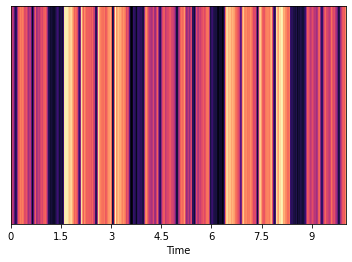

In [15]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [16]:
librosa.display.waveplot(mfccs[5], sr=sample_rate)

IndexError: index 5 is out of bounds for axis 0 with size 1

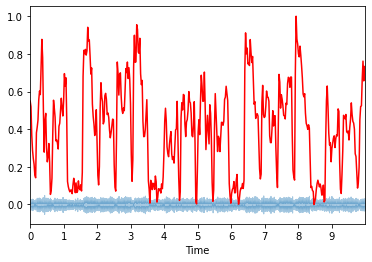

In [17]:
import sklearn

spectral_centroids = librosa.feature.spectral_centroid(audio, sr=sample_rate)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(audio, axis=0):
    return sklearn.preprocessing.minmax_scale(audio, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(audio, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


(1, 431)


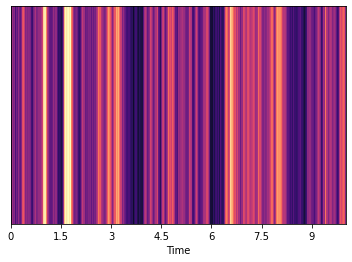

In [18]:
zero_crossings = librosa.feature.zero_crossing_rate(audio)
print(zero_crossings.shape)
librosa.display.specshow(zero_crossings, sr=sample_rate, x_axis='time')